In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#%cd drive/MyDrive/Github/master_thesis
%cd drive/MyDrive/GitHub/master-thesis

/content/drive/MyDrive/GitHub/master-thesis


In [4]:
from clustering.utils import *

In [5]:
df, answers, info = get_cluster_input_data()

In [12]:
pca = PCA(whiten=True)
x_pca = pca.fit_transform(answers)
df_pca = pd.DataFrame(x_pca)
for column in df_pca.columns:
  df_pca.rename(columns={column: 'PC_'+str(column)}, inplace=True)
df_pca.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21
0,-0.641915,-0.468453,-0.576263,-0.777437,1.133969,0.028751,0.416831,1.179097,-0.114074,0.974170,...,-0.954631,-1.400624,-0.184333,-0.038798,0.715988,-0.349876,0.238736,0.082417,0.055136,0.355448
1,-1.096078,-0.278974,-0.428854,-0.963841,0.235692,-1.263277,-1.803795,-1.036418,0.094448,0.374341,...,-0.466615,0.181764,-0.757018,-0.137022,0.570194,0.242799,-0.511467,0.913102,-0.535641,0.446813
2,-1.124546,0.316928,0.355196,1.620172,-1.098441,-0.284961,-0.865130,-0.383630,1.812990,0.087174,...,1.774058,-0.119958,-0.655992,0.389976,0.247291,1.369768,1.392489,-0.967504,0.021990,-0.474764
3,0.168970,-1.378000,1.319685,2.175921,1.276588,0.332782,-2.181553,-1.360162,0.156924,-1.029619,...,1.605645,-3.310248,-3.337820,0.650332,-2.918618,2.815321,-0.393094,-3.172427,1.848806,-0.174224
4,1.952285,-1.189026,4.037672,0.701270,-0.322463,-1.033984,-0.917572,0.643469,1.457826,-0.242003,...,1.183091,-0.917949,-0.048935,-0.997434,-0.713335,-1.028554,1.534883,0.851680,-0.721749,-0.067649


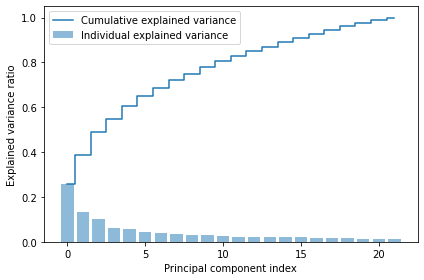

In [13]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

In [14]:
nr_pc_80 = (cum_sum_eigenvalues<=0.8).sum()
print(nr_pc_80,  ' Werte erklären 80% der Daten.')

10  Werte erklären 80% der Daten.


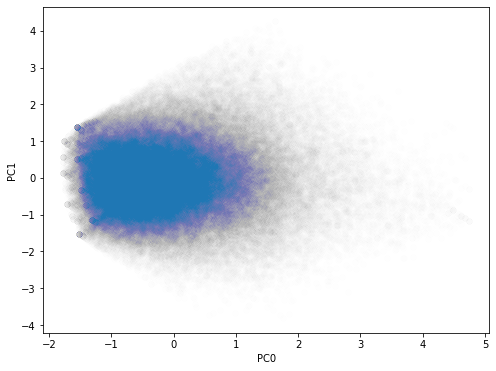

In [15]:
plt.scatter(x=df_pca['PC_0'], y=df_pca['PC_1'], alpha=0.005)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()

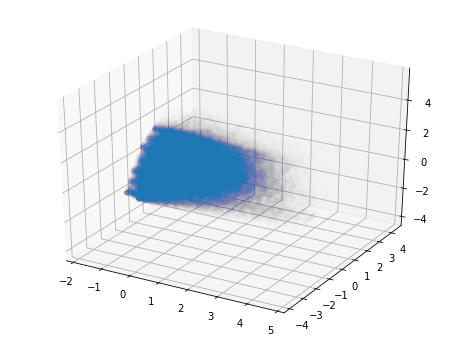

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_pca['PC_0'], df_pca['PC_1'], df_pca['PC_2'], alpha=0.005)

In [17]:
df_pca_write = pd.concat([df_pca.iloc[:,:nr_pc_80].copy(), df], axis=1)
df_pca_write.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122829 entries, 0 to 122828
Data columns (total 66 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   PC_0                                      122829 non-null  float64
 1   PC_1                                      122829 non-null  float64
 2   PC_2                                      122829 non-null  float64
 3   PC_3                                      122829 non-null  float64
 4   PC_4                                      122829 non-null  float64
 5   PC_5                                      122829 non-null  float64
 6   PC_6                                      122829 non-null  float64
 7   PC_7                                      122829 non-null  float64
 8   PC_8                                      122829 non-null  float64
 9   PC_9                                      122829 non-null  float64
 10  gender              

In [18]:
df_pca_write.to_csv('data/preprocessing/dim_reduction/220405_pca_data.csv', index=False)

# PCA Component Evaluation


23

In [19]:
df_components = pd.DataFrame(pca.components_, columns=get_behaviour_cols()).transpose()
df_components.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Q1_2_covid_is_threat,-0.183108,-0.076908,-0.016395,0.250760,0.112506,-0.803681,0.221945,-0.353114,0.217723,-0.010258,...,0.070082,-0.034608,0.016565,-0.007770,-0.010694,-0.011645,-0.003431,0.044829,-0.007944,0.000103
Q2_1_easy_to_follow_advice,-0.202635,0.201182,-0.162973,-0.102176,-0.389519,0.073447,0.078626,-0.089930,-0.003203,-0.094322,...,0.175724,0.447067,0.129465,-0.280556,0.112316,-0.065934,0.014662,-0.017651,-0.003969,-0.006275
Q2_2_can_follow_advice_if_wanted,-0.163316,0.143538,-0.278220,-0.090100,-0.402502,0.013420,0.105156,-0.034878,-0.014478,0.031645,...,-0.165614,-0.468317,-0.337443,0.353848,-0.364045,-0.014994,0.003667,-0.013120,-0.012471,0.009937
Q2_3_if_follow_advice_safe,-0.218159,0.166715,-0.279726,-0.025636,-0.223959,-0.021083,0.048245,0.007244,0.058628,0.105645,...,0.300102,0.266488,0.180073,0.079245,-0.388219,-0.115741,-0.015258,-0.001283,-0.021051,-0.010927
Q2_4_if_follow_advice_others_safe,-0.190423,0.144456,-0.291166,-0.009652,-0.296491,-0.081685,0.074888,0.078642,-0.033269,0.079366,...,-0.185715,-0.206415,-0.009449,-0.178597,0.678328,0.213388,-0.010981,0.124962,-0.015613,0.027682


In [20]:
df_components = df_components.apply(lambda x: np.abs(x))
df_components.nlargest(5, columns=0)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Q3_7_minimize_activities_w_contact,0.301455,0.254699,0.128940,0.183446,0.017460,0.065733,0.003816,0.284384,0.140658,0.028032,...,0.156255,0.028378,0.005848,0.118068,0.113663,0.244375,0.640540,0.100329,0.036212,0.102005
Q3_6_avoid_crowds,0.292978,0.216613,0.141883,0.175977,0.014837,0.054681,0.037347,0.201703,0.092106,0.019717,...,0.243849,0.103318,0.112409,0.266818,0.255780,0.425176,0.446878,0.062292,0.054084,0.010343
Q6_9_trust_political_strategy,0.288492,0.218934,0.139937,0.184899,0.383015,0.048871,0.127715,0.143347,0.000008,0.001888,...,0.065481,0.270641,0.699796,0.016713,0.026929,0.123162,0.008753,0.136560,0.093769,0.007640
Q3_2_avoid_contact,0.282046,0.200974,0.129818,0.172361,0.024789,0.040858,0.079047,0.169683,0.098258,0.023863,...,0.128517,0.100214,0.014752,0.409251,0.281260,0.408969,0.513576,0.002668,0.222828,0.049326
Q6_6_clear_information_on_advice_reason,0.270455,0.187178,0.137115,0.155386,0.331267,0.135023,0.113941,0.079330,0.126392,0.058531,...,0.479780,0.486237,0.374838,0.049992,0.076216,0.027813,0.021480,0.044591,0.025778,0.014877


In [21]:
df_components.nlargest(5, columns=0).index.tolist()

['Q3_7_minimize_activities_w_contact',
 'Q3_6_avoid_crowds',
 'Q6_9_trust_political_strategy',
 'Q3_2_avoid_contact',
 'Q6_6_clear_information_on_advice_reason']

In [22]:
range(10)

range(0, 10)

In [23]:
for column in range(5):
  top_cols = df_components.nlargest(5, columns=column).index.tolist()
  print('PC ' + str(column) + ': ' + str(top_cols))

PC 0: ['Q3_7_minimize_activities_w_contact', 'Q3_6_avoid_crowds', 'Q6_9_trust_political_strategy', 'Q3_2_avoid_contact', 'Q6_6_clear_information_on_advice_reason']
PC 1: ['Q6_7_advice_limits_daily_activities', 'Q2_5_follow_advice_relationships_impared', 'Q2_6_follow_advice_life_degraded', 'Q3_7_minimize_activities_w_contact', 'Q6_9_trust_political_strategy']
PC 2: ['Q2_5_follow_advice_relationships_impared', 'Q2_6_follow_advice_life_degraded', 'Q6_7_advice_limits_daily_activities', 'Q2_4_if_follow_advice_others_safe', 'Q2_3_if_follow_advice_safe']
PC 3: ['Q5_5_feel_urge_scold', 'Q1_2_covid_is_threat', 'Q6_3_others_can_avoid_spreading', 'Q6_9_trust_political_strategy', 'Q3_7_minimize_activities_w_contact']
PC 4: ['Q2_2_can_follow_advice_if_wanted', 'Q2_1_easy_to_follow_advice', 'Q6_9_trust_political_strategy', 'Q5_5_feel_urge_scold', 'Q6_6_clear_information_on_advice_reason']


# Kernel PCA

In [ ]:
df_survey_beh_sample = df_survey_beh.sample(n=10000)

In [ ]:
x_sample = StandardScaler().fit_transform(df_survey_beh_sample)

In [ ]:
x_sample.shape

(10000, 22)

In [ ]:
# To-Do: Check for positive semi definite -eigenvalues are non-negative

In [ ]:
kpca = KernelPCA(n_components=26, eigen_solver='arpack', copy_X=False, kernel='sigmoid')
x_kpca = kpca.fit_transform(x_sample)
df_kpca = pd.DataFrame(x_kpca)
df_kpca.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.466390,0.302126,0.118644,0.012638,0.248977,-0.381341,-0.015837,-0.004593,0.138671,-0.350916,...,-0.028234,0.104112,-0.045929,-0.122367,0.085621,-0.011604,-0.034631,-0.000300,0.008577,-0.041149
1,-0.093418,-0.264926,0.183270,-0.147775,0.299435,-0.007069,-0.043500,-0.042675,-0.128777,0.160317,...,0.032661,-0.126259,0.038438,0.040414,0.013526,0.001774,0.042204,-0.014326,-0.030870,0.001323
2,0.309963,0.256956,-0.048864,-0.256740,0.005405,0.024832,-0.054430,-0.170896,-0.040618,-0.054067,...,-0.002022,-0.003709,-0.012431,0.038405,-0.022747,0.082069,-0.054764,-0.035319,0.044554,0.012240
3,0.066850,-0.108863,-0.049323,0.224350,0.078553,0.010610,0.081784,0.054939,0.011856,0.055454,...,-0.088955,-0.033308,0.033609,-0.116695,0.031079,0.069647,0.020821,0.018718,0.013688,0.033658
4,0.567640,-0.529334,0.628120,-0.069331,0.072804,0.093121,0.087517,-0.094965,-0.022075,-0.159308,...,0.070810,-0.088398,-0.048873,0.005095,0.014612,0.028138,-0.122948,0.014118,0.055222,0.244666


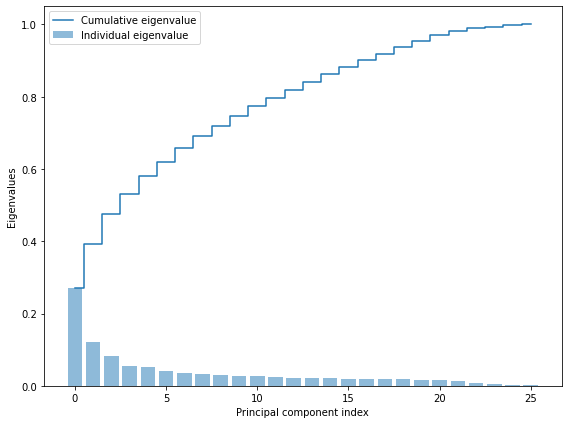

In [ ]:
var_values = kpca.eigenvalues_ / sum(kpca.eigenvalues_)

cum_sum_eigenvalues_kpca = np.cumsum(var_values)

plt.bar(range(0,len(var_values)), var_values, alpha=0.5, align='center', label='Individual eigenvalue')
plt.step(range(0,len(cum_sum_eigenvalues_kpca)), cum_sum_eigenvalues_kpca, where='mid',label='Cumulative eigenvalue')
plt.ylabel('Eigenvalues')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

In [ ]:
print((cum_sum_eigenvalues_kpca<=0.8).sum(),  ' Werte erklären 80% der Daten.')

12  Werte erklären 80% der Daten.


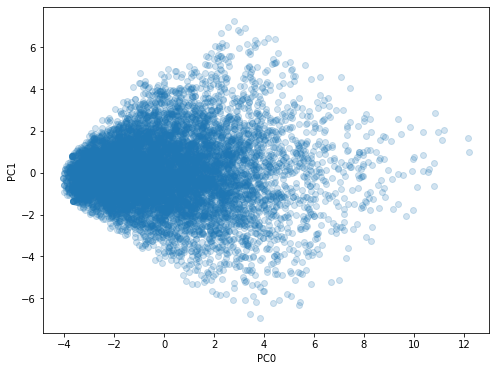

In [ ]:
plt.scatter(x=df_kpca[0], y=df_kpca[1], alpha=0.2)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()